In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import statistics
import pickle
import torch

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
transitions_df = pd.read_csv(r'C:\Users\User\Desktop\Course_work_practice\transitions_dict_240.csv').iloc[:, 1:]
transitions_df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Desktop\\Course_work_practice\\transitions_dict_240.csv'

### Statistics and Plots

In [ ]:
transitions_df.loc[:119].describe() # description of lie cases

In [ ]:
transitions_df.loc[120:].describe() # description of truth cases

In [19]:
emotions_df = pd.read_csv(r'C:\Users\User\Desktop\Course_work_practice\emotions_dict.csv').iloc[:, 1:]
emotions_df

,video_name,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
0,trial_lie_001,82,50,222,7,35,99,8,5
1,trial_lie_002,50,31,767,16,455,227,138,188
2,trial_lie_003,21,3,10,117,0,34,11,14
3,trial_lie_004,9,18,77,82,57,65,24,15
4,trial_lie_005,28,18,516,173,154,330,168,181
...,...,...,...,...,...,...,...,...,...
116,trial_truth_056,87,64,55,39,3,10,72,14
117,trial_truth_057,17,20,1027,2,5,55,1,10
118,trial_truth_058,70,69,390,12,11,23,7,46
119,trial_truth_059,140,5,525,5,1,99,3,30


In [21]:
emotions_df.loc[:60].describe() # description of lie cases

,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,60.180328,122.032787,249.262295,80.655738,27.524590,114.081967,54.737705,58.245902
std,61.524388,152.266977,245.821609,104.997125,62.655834,121.731439,81.558957,66.949398
min,2.000000,3.000000,1.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,15.000000,21.000000,60.000000,19.000000,2.000000,24.000000,10.000000,14.000000
50%,50.000000,68.000000,154.000000,49.000000,9.000000,86.000000,24.000000,38.000000
75%,82.000000,176.000000,408.000000,82.000000,26.000000,157.000000,68.000000,76.000000
max,309.000000,856.000000,928.000000,478.000000,455.000000,660.000000,463.000000,338.000000


In [22]:
emotions_df.loc[61:].describe() # description of truth cases

,Anger,Contempt,Disgust,Fear,Happiness,Neutral,Sadness,Surprise
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,43.283333,66.650000,266.850000,58.983333,10.133333,137.966667,37.916667,42.000000
std,61.693362,80.981652,287.933245,102.216369,16.437315,173.365878,60.725638,81.371923
min,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,0.000000,1.000000
25%,10.750000,10.000000,70.750000,10.000000,2.000000,35.750000,6.750000,11.000000
50%,17.500000,33.000000,173.500000,31.000000,5.000000,92.000000,18.000000,23.500000
75%,60.000000,104.500000,363.750000,60.250000,11.000000,188.000000,40.000000,40.250000
max,406.000000,382.000000,1582.000000,655.000000,104.000000,1130.000000,358.000000,599.000000


In [8]:
pd.options.display.max_columns = 70

In [26]:
numeric_vars=transitions_df.describe().columns

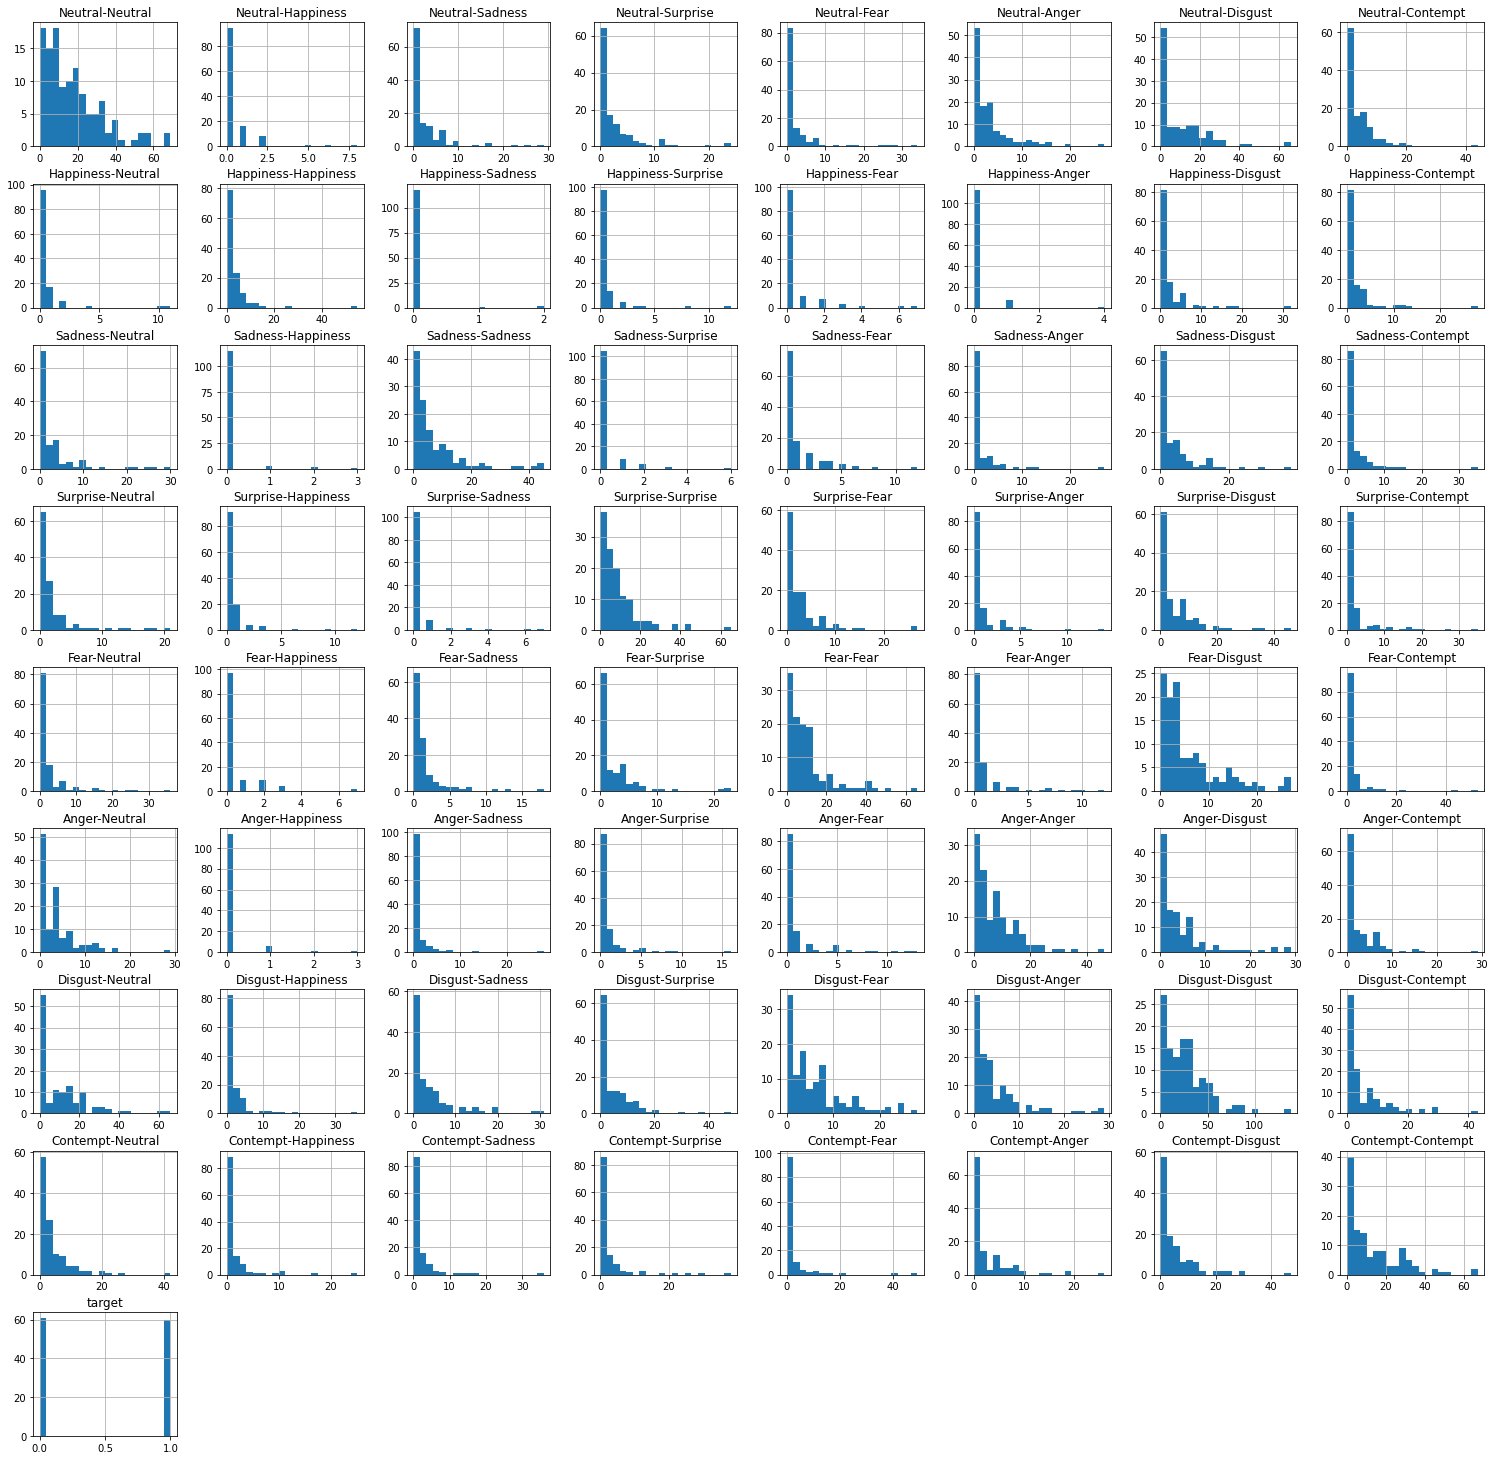

In [28]:
transitions_df.hist(column=numeric_vars,figsize=(26,26), bins=20)
plt.show()

Correlation Matrix 



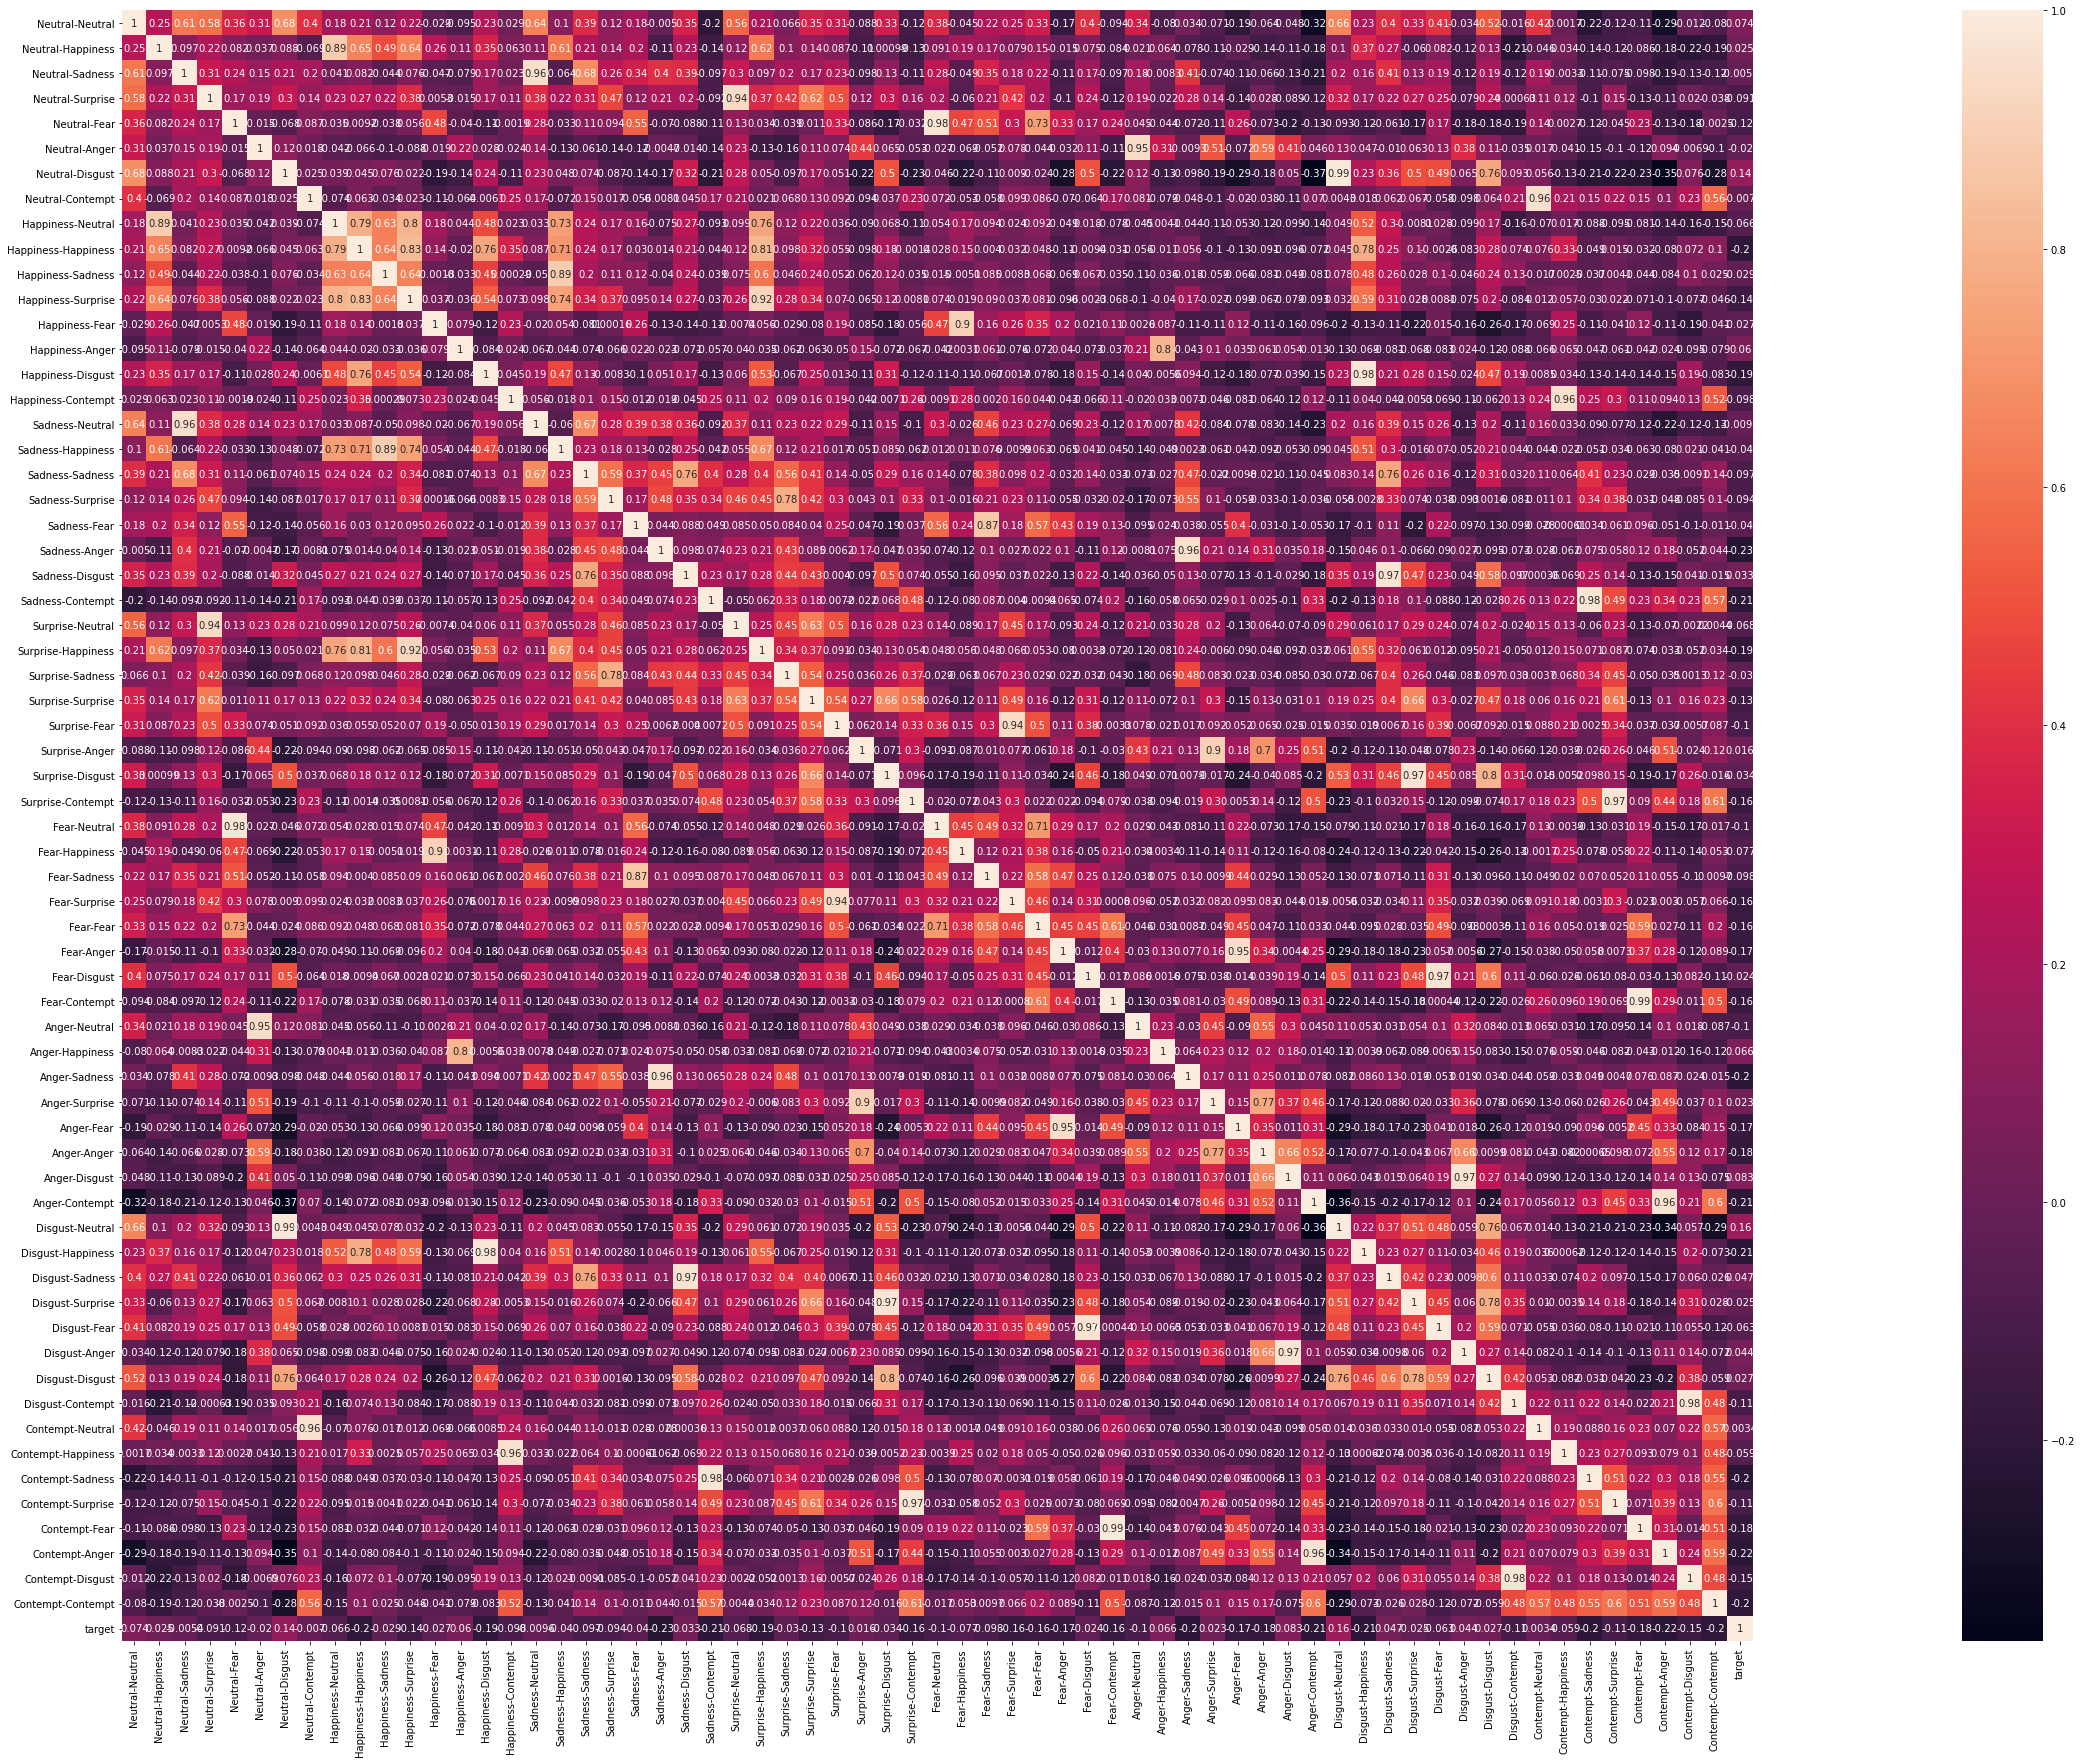

In [35]:
print("Correlation Matrix","\n")    
correlation=transitions_df.corr(method="pearson")
plt.figure(figsize=(75,30))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()

### Train/test split

In [ ]:
X = transitions_df.iloc[:, 1:-1].values
y = transitions_df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### Learning imports

In [6]:
!pip install xgboost

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

### Find best parameters

#### Linear-SVC

In [ ]:
classifier = svm.LinearSVC()

rand_list = {"C": stats.uniform(2, 10)}
              
rand_search = RandomizedSearchCV(classifier, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 10, random_state = 2017, scoring = auc) 
rand_search.fit(X, y) 
print(rand_search.best_estimator_)

LinearSVC(C=2.209602254061174)


c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### SVC

In [203]:
classifier = svm.SVC()

rand_list = {"C": stats.uniform(2, 10)}
              
rand_search = RandomizedSearchCV(classifier, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 10, random_state = 2017, scoring = auc) 
rand_search.fit(X, y) 
print(rand_search.best_estimator_)

SVC(C=2.209602254061174)


### Logistic Regression

In [193]:
lr_model_params = {
    'C': np.linspace(1e-4, 1000, 100),
    'penalty': ['l1', 'l2', 'elasticnet'],
    'class_weight': ['balanced'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': np.linspace(1e-6, 1, 1000)
}

lr_model = RandomizedSearchCV( # try GridSearch()
    estimator=LogisticRegression(),
    param_distributions=lr_model_params,
    scoring='roc_auc',
    cv=10, n_jobs=-1, verbose=True
).fit(X_train, y_train)

print(lr_model.best_estimator_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
LogisticRegression(C=343.43440909090907, class_weight='balanced',
                   solver='newton-cg', tol=0.34734799999999993)


### Decision Tree

In [181]:
param_dist = {"max_depth": [3, None],
              "max_features": stats.randint(1, 9),
              "min_samples_leaf": stats.randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=10)

tree_cv.fit(X,y)
print(tree_cv.best_estimator_)

DecisionTreeClassifier(max_features=4, min_samples_leaf=2)


### Random Forest 

In [107]:
rfc_model = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 2000, num = 20)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc_model, 
                        param_dist, 
                        n_iter = 100, 
                        scoring = 'roc_auc',
                        cv = 10, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'n_estimators': 631, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 6, 'bootstrap': True}


In [109]:
print(rs.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=2,
                       n_estimators=631)


### KNN

In [184]:
knn_params = {
    'n_neighbors': range(1, 15),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': range(1, 50),
    'metric': ['euclidean','manhattan','minkowski']
}

knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=knn_params,
    scoring='roc_auc', 
    cv=5, n_jobs=-1, verbose=True
).fit(X_train, y_train)
print(knn.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
KNeighborsClassifier(algorithm='ball_tree', leaf_size=35, metric='manhattan',
                     n_neighbors=14, weights='distance')


### Cross_val_score

In [8]:
def plots_and_metrics(cv, classifier, title):
    tprs = []
    aucs = []
    matrices = []
    precisions = []
    recalls = []
    fs = []
    mean_fpr = np.linspace(0, 1, 100)

    roc_fig, roc_ax = plt.subplots(figsize=(10,7))
    
    for i, (train, test) in enumerate(cv.split(X, y)):
        classifier.fit(X[train], y[train])
        pred = classifier.predict(X[test])

        viz = plot_roc_curve(classifier, X[test], y[test],
                                name='ROC fold {}'.format(i),
                                alpha=0.3, lw=1, ax=roc_ax)
        matrices.append(confusion_matrix(y[test], pred))

        precisions.append(precision_score(y[test], pred))
        recalls.append(recall_score(y[test], pred))
        fs.append(2 * (precision_score(y[test], pred) * recall_score(y[test], pred)) / (precision_score(y[test], pred) + recall_score(y[test], pred)))

        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    roc_ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    roc_ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    roc_ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    roc_ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
    title=title)
    roc_ax.legend(loc="lower right")
    plt.show()

    mean_matrix = np.mean(matrices, axis = 0)
    conf_ax = sns.heatmap(mean_matrix, annot=True, cmap='Blues')
    conf_ax.set_title('Mean Seaborn Confusion Matrix with labels\n\n' + title)
    conf_ax.set_xlabel('\nPredicted Values')
    conf_ax.set_ylabel('Actual Values ')
    conf_ax.xaxis.set_ticklabels(['False','True'])
    conf_ax.yaxis.set_ticklabels(['False','True'])
    plt.show()
    
    print("%0.2f mean precision with a standard deviation of %0.2f" % (statistics.mean(precisions), statistics.pstdev(precisions)))
    print("%0.2f mean recall with a standard deviation of %0.2f" % (statistics.mean(recalls), statistics.pstdev(recalls)))
    print("%0.2f mean F1-score with a standard deviation of %0.2f" % (statistics.mean(fs), statistics.pstdev(fs)))

#### LinearSVC

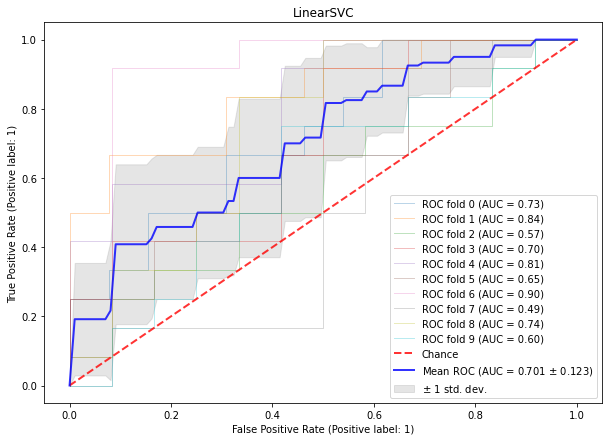

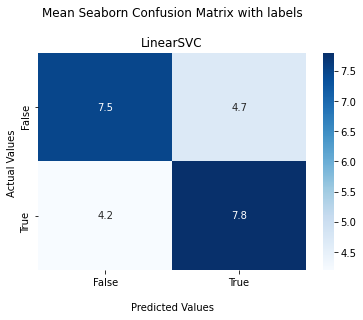

0.63 mean precision with a standard deviation of 0.12
0.65 mean recall with a standard deviation of 0.19
0.63 mean F1-score with a standard deviation of 0.13


In [17]:
cv = StratifiedKFold(n_splits=10, shuffle = True)
classifier = svm.LinearSVC(C = 2.209602254061174, max_iter=2000)

plots_and_metrics(cv, classifier, 'LinearSVC')

#### SVC

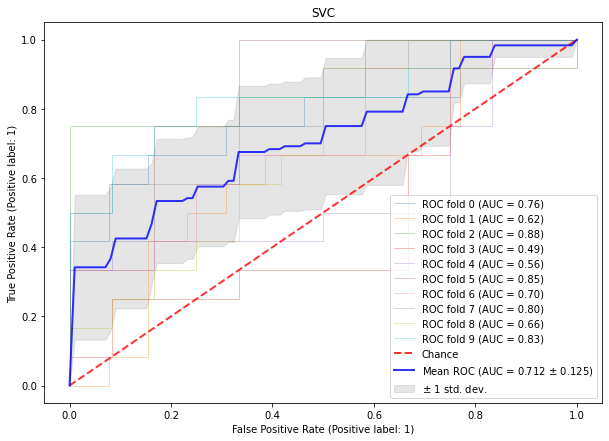

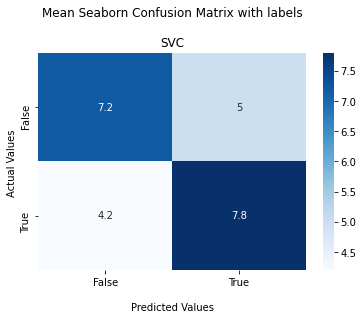

0.61 mean precision with a standard deviation of 0.11
0.65 mean recall with a standard deviation of 0.11
0.63 mean F1-score with a standard deviation of 0.11


In [166]:
cv = StratifiedKFold(n_splits=10, shuffle = True)
classifier = svm.SVC(C = 2.209602254061174, gamma = 'scale')

plots_and_metrics(cv, classifier, 'SVC')

#### KNN

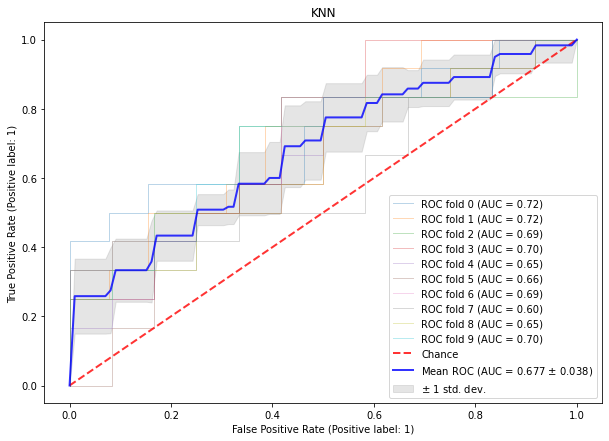

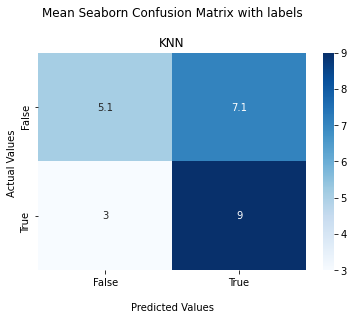

0.56 mean precision with a standard deviation of 0.05
0.75 mean recall with a standard deviation of 0.11
0.64 mean F1-score with a standard deviation of 0.05


In [192]:
knn_clf = KNeighborsClassifier(algorithm='ball_tree', leaf_size=35, metric='manhattan',
                     n_neighbors=14, weights='distance')
cv=StratifiedKFold(10, shuffle = True)
plots_and_metrics(cv, knn_clf, 'KNN')

#### Logistic Regression

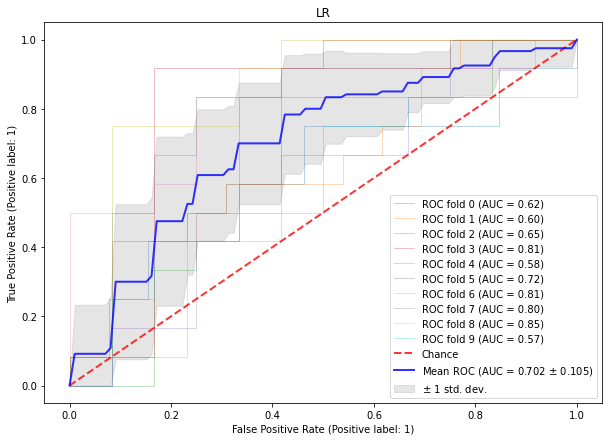

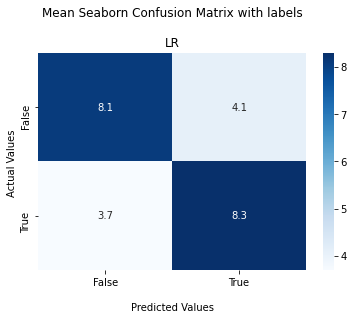

0.68 mean precision with a standard deviation of 0.10
0.69 mean recall with a standard deviation of 0.13
0.68 mean F1-score with a standard deviation of 0.11


In [202]:
lr_clf = LogisticRegression(C=343.43440909090907, class_weight='balanced',
                   solver='newton-cg', tol=0.34734799999999993)
cv=StratifiedKFold(10, shuffle = True)
plots_and_metrics(cv, lr_clf, 'LR')

#### Decision Tree

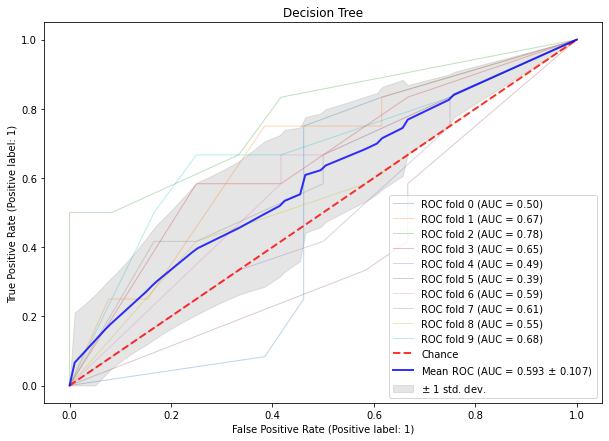

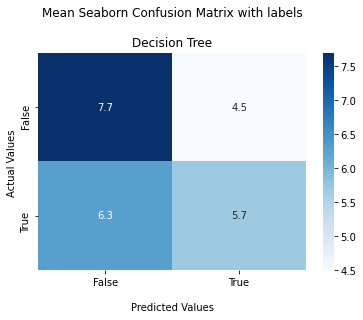

0.57 mean precision with a standard deviation of 0.14
0.47 mean recall with a standard deviation of 0.12
0.51 mean F1-score with a standard deviation of 0.11


In [183]:
dt_clf = DecisionTreeClassifier(max_features=4, min_samples_leaf=2)
cv=StratifiedKFold(10, shuffle = True)
plots_and_metrics(cv, dt_clf, 'Decision Tree')

#### RandomForest

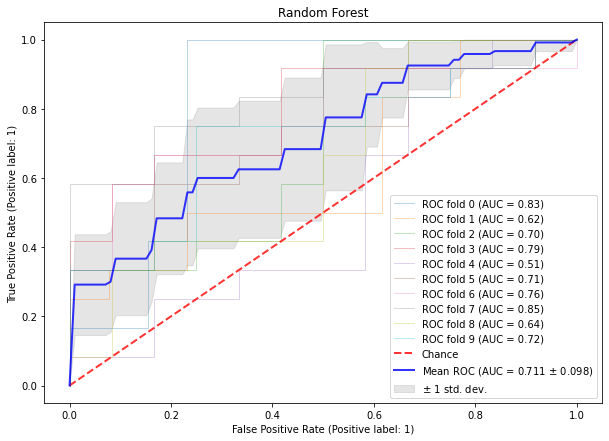

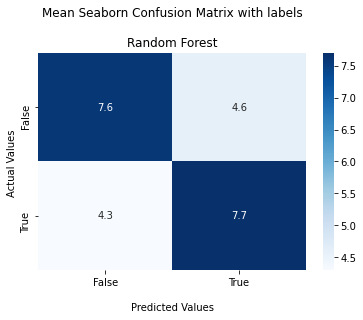

0.63 mean precision with a standard deviation of 0.13
0.64 mean recall with a standard deviation of 0.16
0.63 mean F1-score with a standard deviation of 0.13


In [204]:
rf_clf=RandomForestClassifier(max_depth=6, max_features='log2', min_samples_leaf=2, n_estimators=631)
cv=StratifiedKFold(10, shuffle = True)
plots_and_metrics(cv, rf_clf, 'Random Forest')